<a href="https://colab.research.google.com/github/rtomek9/DS3001Group23/blob/main/Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Test file for github

x = ' Hello World'


import pandas as pd
#
var_list = ['happy', 'hapunhap','relig','attend', 'relig16','age','income'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [44]:
# Cleaning attend
df = pd.read_csv("/content/selected_gss_data.csv")
print(df.shape)
print(df.head())
print(df['attend'].describe())
print(df['attend'].unique())
print(df['attend'].value_counts())

# Looks pretty good already

(72392, 7)
           happy hapunhap       relig                      attend relig16  \
0  not too happy      NaN      jewish  about once or twice a year     NaN   
1  not too happy      NaN    catholic                  every week     NaN   
2   pretty happy      NaN  protestant          about once a month     NaN   
3  not too happy      NaN       other                       never     NaN   
4   pretty happy      NaN  protestant                       never     NaN   

    age income  
0  23.0    NaN  
1  70.0    NaN  
2  48.0    NaN  
3  27.0    NaN  
4  61.0    NaN  
count     71692
unique       10
top       never
freq      13855
Name: attend, dtype: object
['about once or twice a year' 'every week' 'about once a month' 'never'
 'several times a year' 'several times a week' '2-3 times a month'
 'less than once a year' 'nearly every week' nan 'attend']
never                         13855
every week                    13659
about once or twice a year     9415
several times a year      

In [46]:
# Cleaning relig16
print(df['relig16'].describe())
print(df['relig16'].unique())
print(df['relig16'].value_counts())

# Looks pretty good
# Rename for clarity
df = df.rename(columns = {'relig16':'relig_fam'})


KeyError: 'relig16'

In [47]:
# Cleaning age
print(df['age'].describe())
print(df['age'].unique())
print(df['age'].value_counts())
print(df['age'].dtype)

# Looks pretty good
# Cast as int to make it cleaner
df['age'] = df['age'].astype('Int64')

print(df['age'].dtype)


count     71623
unique       73
top        30.0
freq       1571
Name: age, dtype: object
['23.0' '70.0' '48.0' '27.0' '61.0' '26.0' '28.0' '21.0' '30.0' '56.0'
 '54.0' '49.0' '41.0' '24.0' '62.0' '46.0' '57.0' '58.0' '71.0' '53.0'
 '42.0' '20.0' '25.0' '78.0' '35.0' '51.0' '76.0' '39.0' '64.0' '50.0'
 '40.0' '43.0' '37.0' '22.0' '31.0' '52.0' '47.0' '45.0' '68.0' '63.0'
 '19.0' '55.0' '44.0' '34.0' '36.0' '74.0' '69.0' '29.0' '67.0' '75.0'
 '38.0' '73.0' '84.0' '82.0' '72.0' '59.0' '33.0' '81.0' '65.0' '32.0' nan
 '60.0' '80.0' '66.0' '77.0' '18.0' '79.0' '83.0' '85.0' '88.0' '87.0'
 '89.0' '86.0' 'age']
30.0    1571
32.0    1566
34.0    1552
28.0    1548
33.0    1526
        ... 
85.0     221
86.0     211
87.0     158
88.0     130
age        2
Name: age, Length: 73, dtype: int64
object


ValueError: invalid literal for int() with base 10: '23.0'

In [48]:
#Cleaning happy
print(df.shape)
print(df['happy'].describe())
print(df['happy'].unique())
print(df['happy'].value_counts())
print( 'Total missing: ', sum( df['happy'].isnull() ) )

df = df.dropna(subset=['happy'])
print(df['happy'].describe())

(72392, 7)
count            67590
unique               4
top       pretty happy
freq             37813
Name: happy, dtype: object
['not too happy' 'pretty happy' 'very happy' nan 'happy']
pretty happy     37813
very happy       20385
not too happy     9390
happy                2
Name: happy, dtype: int64
Total missing:  4802
count            67590
unique               4
top       pretty happy
freq             37813
Name: happy, dtype: object


In [49]:
print(df['hapunhap'].describe())
print(df['hapunhap'].unique())
print(df['hapunhap'].value_counts())
print( 'Total missing: ', sum( df['hapunhap'].isnull() ) )
#19,434 missing values ... might not want to use.


count     7396
unique       8
top        2.0
freq      3565
Name: hapunhap, dtype: object
[nan 'hapunhap' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0']
2.0         3565
1.0         2710
3.0          864
4.0          160
5.0           72
6.0           17
7.0            6
hapunhap       2
Name: hapunhap, dtype: int64
Total missing:  60194


In [50]:
print(df['income'].describe())
print(df['income'].unique())
print(df['income'].value_counts())
print( 'Total missing: ', sum( df['income'].isnull() ) )
df = df.dropna(subset=['income'])
print( 'Total missing: ', sum( df['income'].isnull() ) )


count               59294
unique                 13
top       $25,000 or more
freq                31963
Name: income, dtype: object
[nan '$10,000 to $14,999' '$7,000 to $7,999' '$4,000 to $4,999'
 '$1,000 to $2,999' '$15,000 to $19,999' '$5,000 to $5,999'
 '$20,000 to $24,999' '$3,000 to $3,999' 'under $1,000' '$8,000 to $9,999'
 '$25,000 or more' '$6,000 to $6,999' 'income']
$25,000 or more       31963
$10,000 to $14,999     6565
$20,000 to $24,999     5226
$15,000 to $19,999     5030
$8,000 to $9,999       2192
$1,000 to $2,999       1359
$5,000 to $5,999       1270
$3,000 to $3,999       1267
$7,000 to $7,999       1263
$6,000 to $6,999       1178
$4,000 to $4,999       1149
under $1,000            830
income                    2
Name: income, dtype: int64
Total missing:  8296
Total missing:  0


1613       prot
1614       prot
1615       prot
1616       none
1617       prot
          ...  
72387    christ
72388      cath
72389      none
72390      none
72391      prot
Name: relig, Length: 59292, dtype: object


<Axes: xlabel='relig', ylabel='Count'>

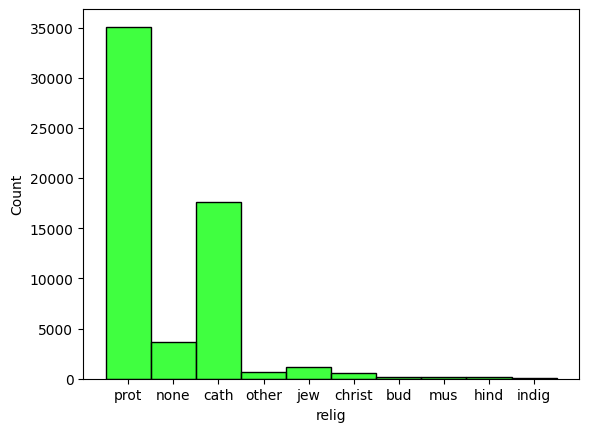

In [85]:
# making visualization and further cleaning:
import seaborn as sns

# renaming the religions so they fit in axis
df['relig'] = df['relig'].replace('protestant', 'prot')
df['relig'] = df['relig'].replace('catholic', 'cath')
df['relig'] = df['relig'].replace('jewish', 'jew')
df['relig'] = df['relig'].replace('muslim', 'mus')
df['relig'] = df['relig'].replace('native american', 'indig')
df['relig'] = df['relig'].replace('other eastern religions', 'other')
df['relig'] = df['relig'].replace('christian', 'christ')
df['relig'] = df['relig'].replace('inter-nondenominational', 'christ')
df['relig'] = df['relig'].replace('hinduism', 'hind')
df['relig'] = df['relig'].replace('orthodox-christian', 'christ')
df['relig'] = df['relig'].replace('buddhism', 'bud')
df['relig'] = df['relig'].replace('muslim/islam', 'mus')
df = df[df['relig'] != 'relig'] # removes observations where 'relig' was listed as the person's religion




print(df['relig'])
df['relig'].describe()

sns.histplot(df['relig'], color='lime')

Bar graph of frequency of religions
(we don't have to keep this one)

In [82]:
df.head()

,happy,hapunhap,relig,attend,relig_fam,age,income
1613,not too happy,NaN,prot,several times a week,protestant,54.0,"$10,000 to $14,999"
1614,very happy,NaN,prot,several times a year,protestant,51.0,"$7,000 to $7,999"
1615,pretty happy,NaN,prot,never,protestant,36.0,"$10,000 to $14,999"
1616,pretty happy,NaN,none,never,none,32.0,"$10,000 to $14,999"
1617,pretty happy,NaN,prot,every week,protestant,54.0,"$10,000 to $14,999"


In [86]:
# clean relig_fam
df['relig_fam'] = df['relig_fam'].replace('protestant', 'prot')
df['relig_fam'] = df['relig_fam'].replace('catholic', 'cath')
df['relig_fam'] = df['relig_fam'].replace('jewish', 'jew')
df['relig_fam'] = df['relig_fam'].replace('muslim', 'mus')
df['relig_fam'] = df['relig_fam'].replace('native american', 'indig')
df['relig_fam'] = df['relig_fam'].replace('other eastern religions', 'other')
df['relig_fam'] = df['relig_fam'].replace('christian', 'christ')
df['relig_fam'] = df['relig_fam'].replace('inter-nondenominational', 'christ')
df['relig_fam'] = df['relig_fam'].replace('hinduism', 'hind')
df['relig_fam'] = df['relig_fam'].replace('orthodox-christian', 'christ')
df['relig_fam'] = df['relig_fam'].replace('buddhism', 'bud')
df['relig_fam'] = df['relig_fam'].replace('muslim/islam', 'mus')
df = df[df['relig_fam'] != 'relig'] # removes observations where 'relig' wa

df.head()

,happy,hapunhap,relig,attend,relig_fam,age,income
1613,not too happy,NaN,prot,several times a week,prot,54.0,"$10,000 to $14,999"
1614,very happy,NaN,prot,several times a year,prot,51.0,"$7,000 to $7,999"
1615,pretty happy,NaN,prot,never,prot,36.0,"$10,000 to $14,999"
1616,pretty happy,NaN,none,never,none,32.0,"$10,000 to $14,999"
1617,pretty happy,NaN,prot,every week,prot,54.0,"$10,000 to $14,999"
